# EDA - 변수 분포 파악

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

## Data Summary

In [ ]:
df_train.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


In [ ]:
df_test.head()

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형
0,ACCIDENT_39609,2022-01-01 01,토요일,맑음,대구광역시 수성구 상동,교차로 - 교차로안,건조,차대사람
1,ACCIDENT_39610,2022-01-01 01,토요일,맑음,대구광역시 수성구 지산동,단일로 - 기타,건조,차대사람
2,ACCIDENT_39611,2022-01-01 04,토요일,맑음,대구광역시 수성구 수성동2가,교차로 - 교차로안,건조,차대차
3,ACCIDENT_39612,2022-01-01 04,토요일,맑음,대구광역시 수성구 신매동,단일로 - 기타,건조,차대차
4,ACCIDENT_39613,2022-01-01 06,토요일,맑음,대구광역시 달서구 감삼동,교차로 - 교차로안,건조,차대차


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

In [ ]:
df_train.isna().sum()

ID               0
사고일시             0
요일               0
기상상태             0
시군구              0
도로형태             0
노면상태             0
사고유형             0
사고유형 - 세부분류      0
법규위반             0
가해운전자 차종         0
가해운전자 성별         0
가해운전자 연령         0
가해운전자 상해정도       0
피해운전자 차종       991
피해운전자 성별       991
피해운전자 연령       991
피해운전자 상해정도     991
사망자수             0
중상자수             0
경상자수             0
부상자수             0
ECLO             0
dtype: int64

In [ ]:
df_test.isna().sum()

ID      0
사고일시    0
요일      0
기상상태    0
시군구     0
도로형태    0
노면상태    0
사고유형    0
dtype: int64

In [ ]:
df_train.describe()

,사망자수,중상자수,경상자수,부상자수,ECLO
count,39609.000000,39609.000000,39609.000000,39609.000000,39609.000000
mean,0.007776,0.262365,1.070085,0.126865,4.726704
std,0.090109,0.500845,0.992034,0.394670,3.207206
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.000000,0.000000,1.000000,0.000000,3.000000
75%,0.000000,0.000000,1.000000,0.000000,6.000000
max,2.000000,6.000000,22.000000,10.000000,74.000000


In [ ]:
df_train.nunique()

ID             39609
사고일시           18057
요일                 7
기상상태               6
시군구              199
도로형태              11
노면상태               6
사고유형               3
사고유형 - 세부분류       14
법규위반              11
가해운전자 차종          12
가해운전자 성별           3
가해운전자 연령          89
가해운전자 상해정도         6
피해운전자 차종          13
피해운전자 성별           3
피해운전자 연령          97
피해운전자 상해정도         6
사망자수               3
중상자수               7
경상자수              18
부상자수               9
ECLO              46
dtype: int64

## 파생변수생성 및 데이터 전처리

In [ ]:
time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})'

df_train[['연', '월', '일', '시간']] = df_train['사고일시'].str.extract(time_pattern)
df_train['월일'] = df_train['월'] + df_train['일']
df_train[['연', '월', '일', '시간']] = df_train[['연', '월', '일', '시간']].apply(pd.to_numeric)
df_train = df_train.drop(columns=['사고일시'])

df_test[['연', '월', '일', '시간']] = df_test['사고일시'].str.extract(time_pattern)
df_test['월일'] = df_test['월'] + df_test['일']
df_test[['연', '월', '일', '시간']] = df_test[['연', '월', '일', '시간']].apply(pd.to_numeric)
df_test = df_test.drop(columns=['사고일시'])

In [ ]:
location_pattern = r'(\S+) (\S+) (\S+)'

df_train[['도시', '구', '동']] = df_train['시군구'].str.extract(location_pattern)
df_train = df_train.drop(columns=['시군구','도시']) # 도시는 모두 대구광역시

df_test[['도시', '구', '동']] = df_test['시군구'].str.extract(location_pattern)
df_test = df_test.drop(columns=['시군구','도시'])

In [ ]:
road_pattern = r'(.+) - (.+)'

df_train[['도로형태1', '도로형태2']] = df_train['도로형태'].str.extract(road_pattern)
df_train = df_train.drop(columns=['도로형태'])

df_test[['도로형태1', '도로형태2']] = df_test['도로형태'].str.extract(road_pattern)
df_test = df_test.drop(columns=['도로형태'])

In [ ]:
df_train.loc[:,'가해운전자 연령'][df_train['가해운전자 연령']=='미분류'] = [np.nan] * len(df_train[df_train['가해운전자 연령']=='미분류'])
df_train.loc[:,'피해운전자 연령'][df_train['피해운전자 연령']=='미분류'] = [np.nan] * len(df_train[df_train['피해운전자 연령']=='미분류'])
df_train.loc[:,'가해운전자 연령'][~df_train['가해운전자 연령'].isna()] = df_train.loc[:,'가해운전자 연령'][~df_train['가해운전자 연령'].isna()].str.replace('세','').str.replace('이상','').astype(int)
df_train.loc[:,'피해운전자 연령'][~df_train['피해운전자 연령'].isna()] = df_train.loc[:,'피해운전자 연령'][~df_train['피해운전자 연령'].isna()].str.replace('세','').str.replace('이상','').astype(int)

# 연령 결측치 중앙값으로 채운다
# df_train['가해운전자 연령'] = df_train['가해운전자 연령'].fillna(df_train['가해운전자 연령'].median())
# df_train['피해운전자 연령'] = df_train['피해운전자 연령'].fillna(df_train['피해운전자 연령'].median())

## 분포 확인

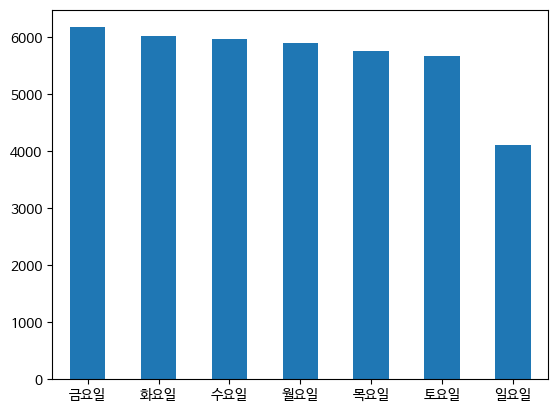

In [ ]:
df_train['요일'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

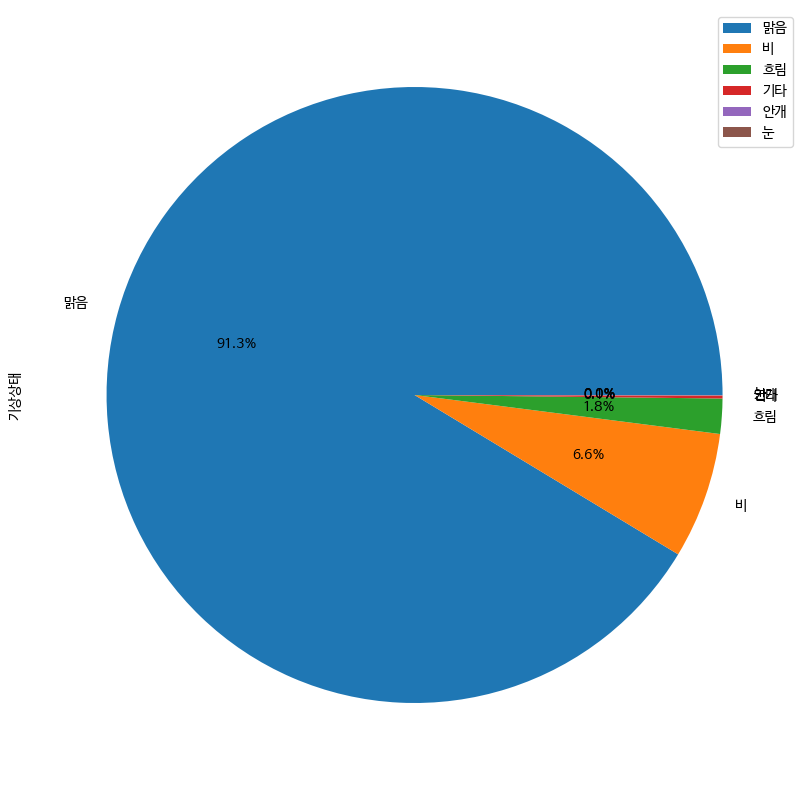

In [ ]:
plt.figure(figsize=(10,10))
df_train['기상상태'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.legend()
plt.show()

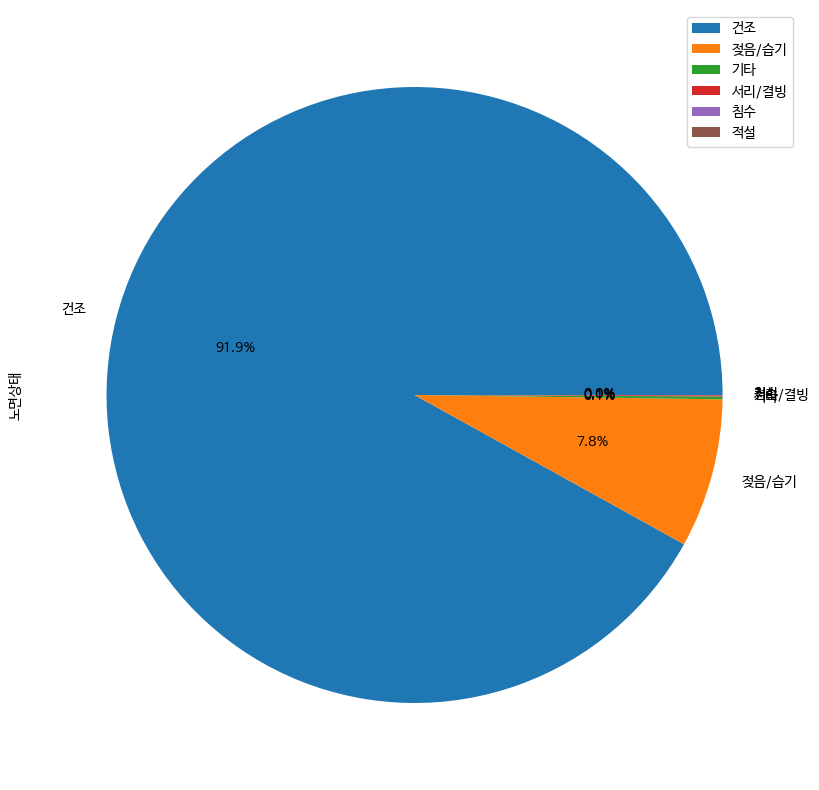

In [ ]:
plt.figure(figsize=(10,10))
df_train['노면상태'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.legend()
plt.show()

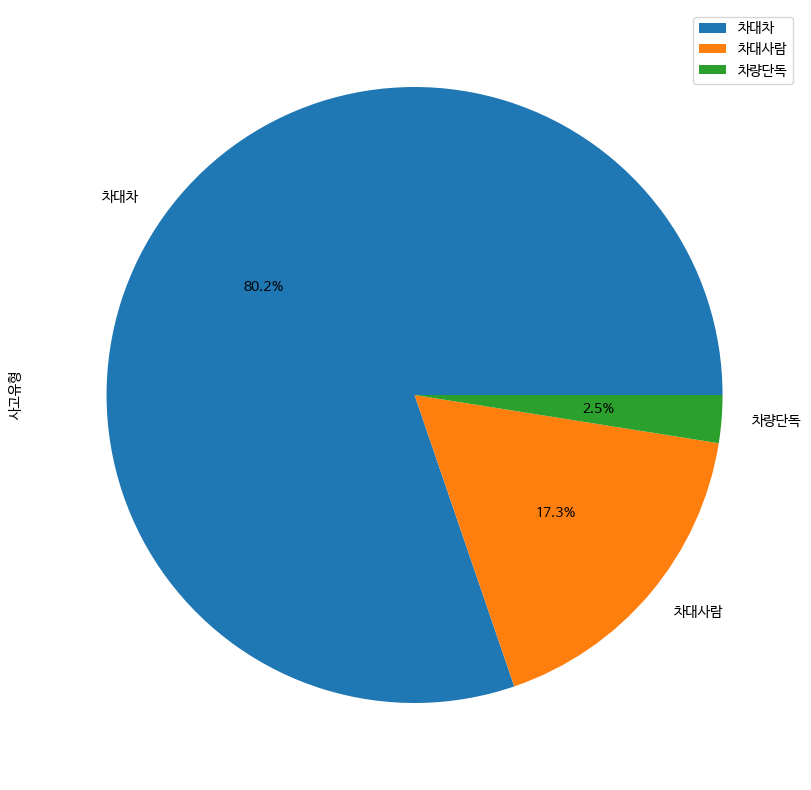

In [ ]:
plt.figure(figsize=(10,10))
df_train['사고유형'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.legend()
plt.show()

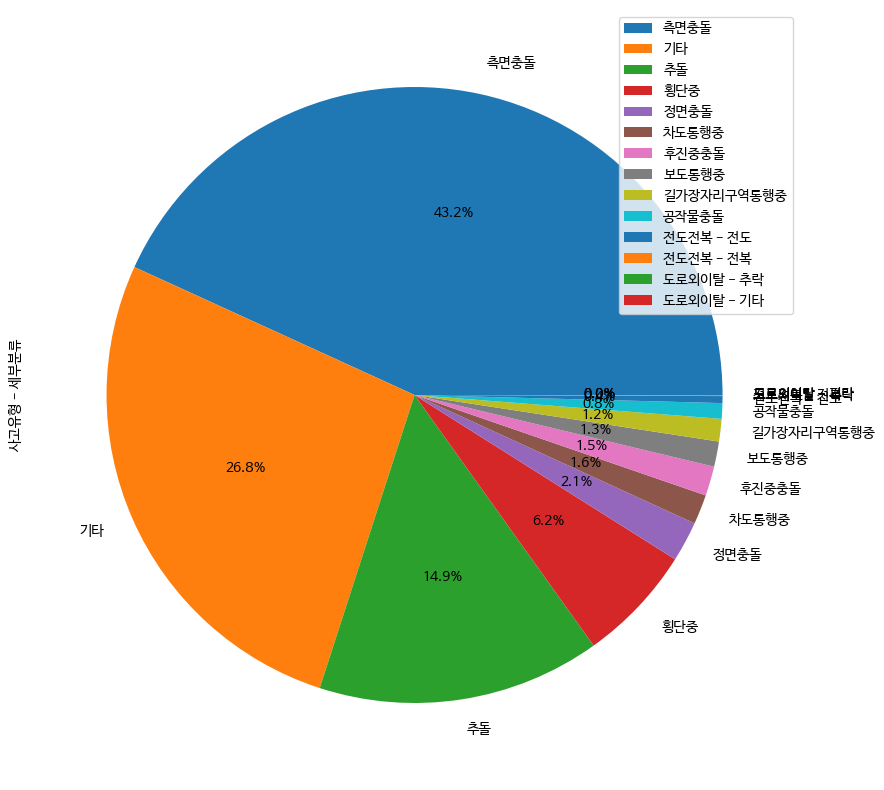

In [ ]:
plt.figure(figsize=(10,10))
df_train['사고유형 - 세부분류'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.legend()
plt.show()

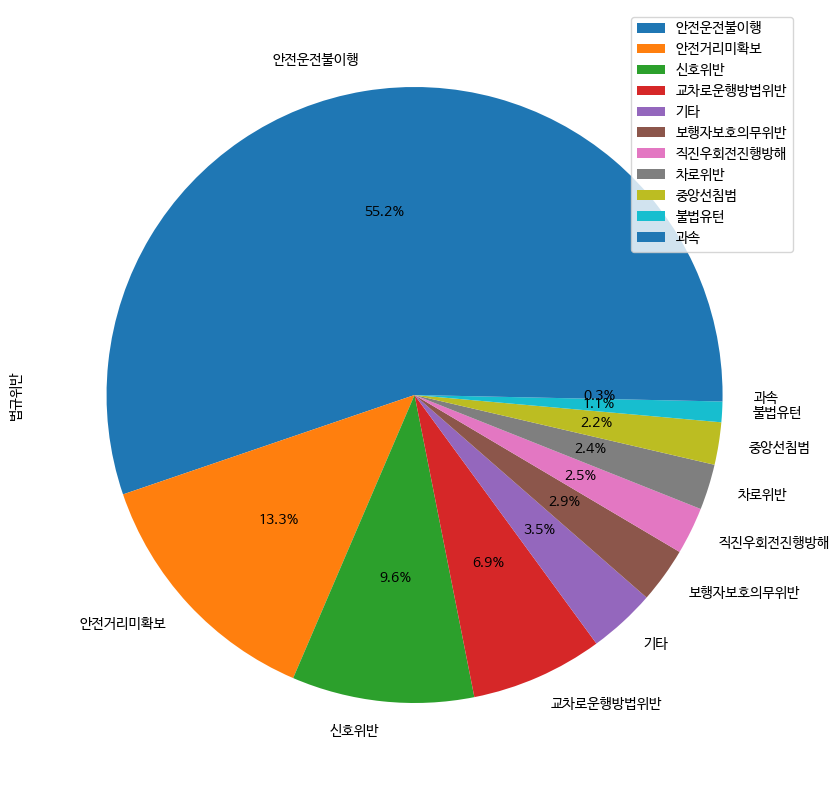

In [ ]:
plt.figure(figsize=(10,10))
df_train['법규위반'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.legend()
plt.show()

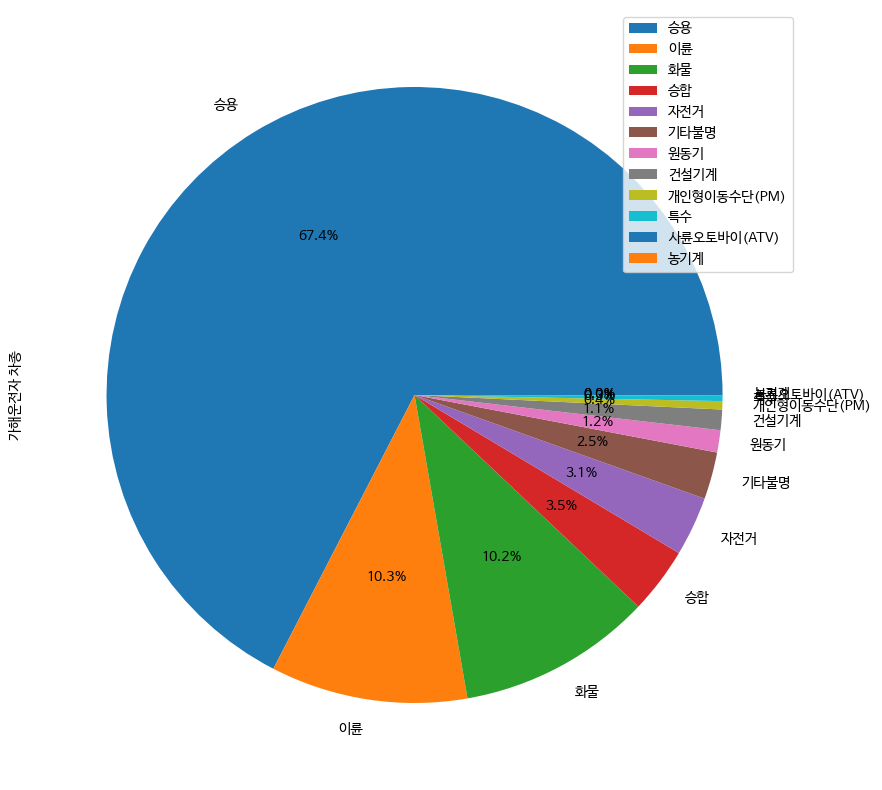

In [ ]:
plt.figure(figsize=(10,10))
df_train['가해운전자 차종'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.legend()
plt.show()

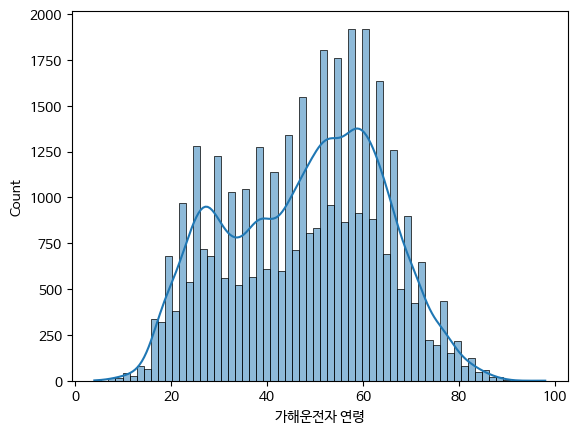

In [ ]:
sns.histplot(df_train['가해운전자 연령'], kde=True)
plt.show()

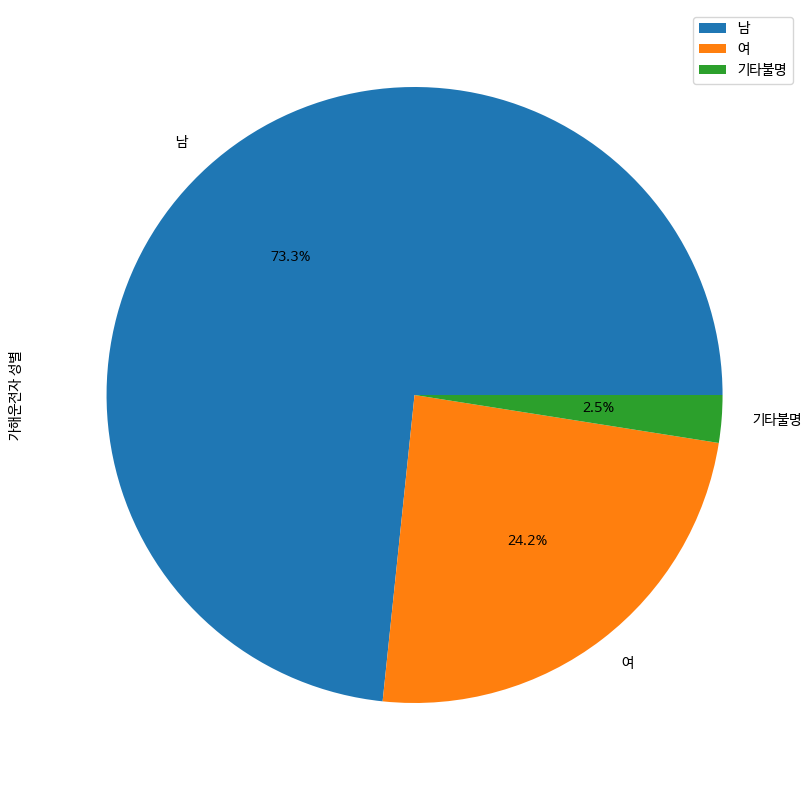

In [ ]:
plt.figure(figsize=(10,10))
df_train['가해운전자 성별'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.legend()
plt.show()

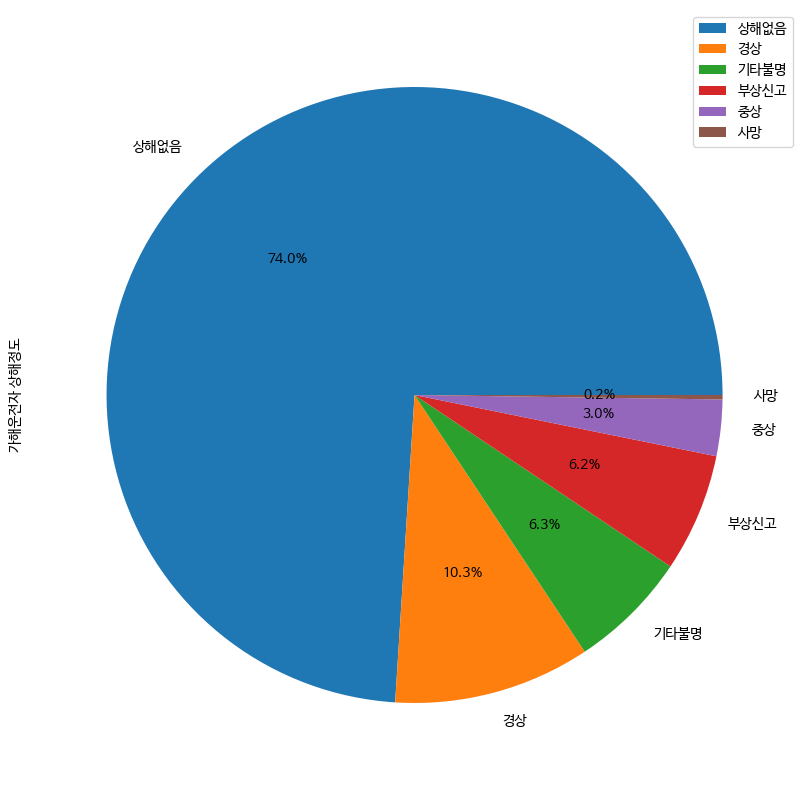

In [ ]:
plt.figure(figsize=(10,10))
df_train['가해운전자 상해정도'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.legend()
plt.show()

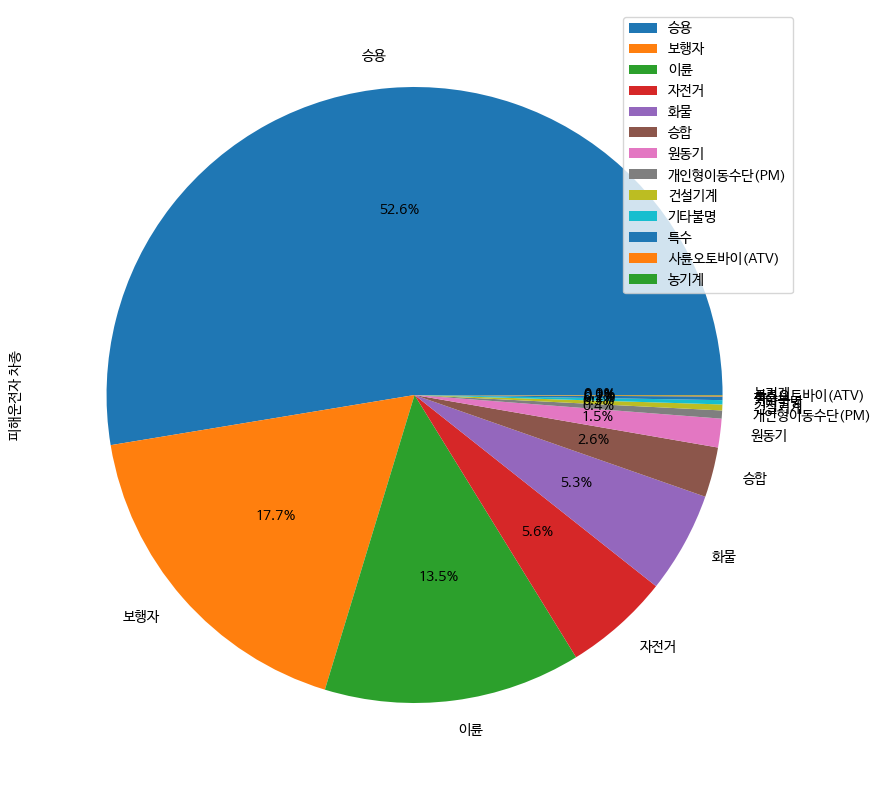

In [ ]:
plt.figure(figsize=(10,10))
df_train['피해운전자 차종'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.legend()
plt.show()

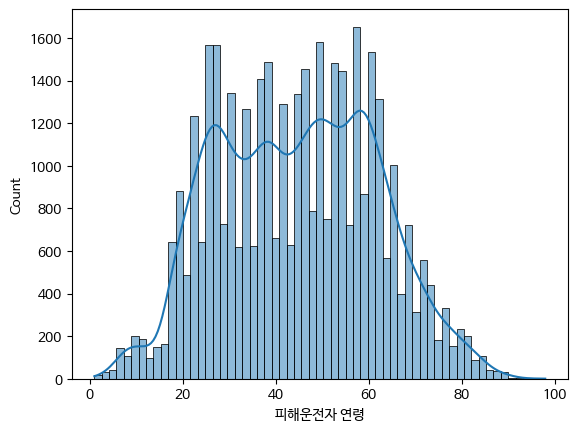

In [ ]:
sns.histplot(df_train['피해운전자 연령'], kde=True)
plt.show()

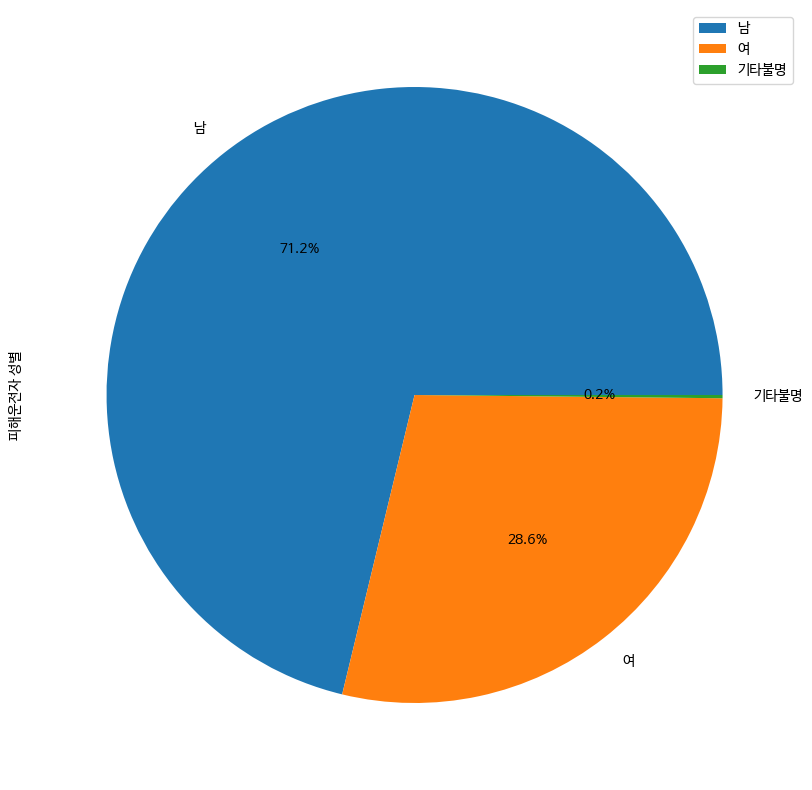

In [ ]:
plt.figure(figsize=(10,10))
df_train['피해운전자 성별'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.legend()
plt.show()

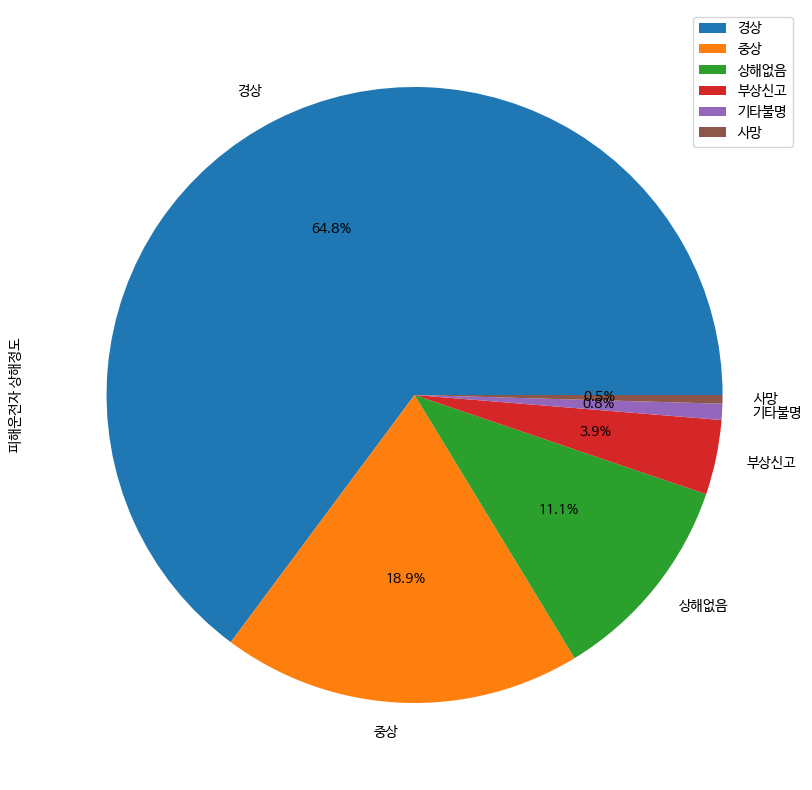

In [ ]:
plt.figure(figsize=(10,10))
df_train['피해운전자 상해정도'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.legend()
plt.show()

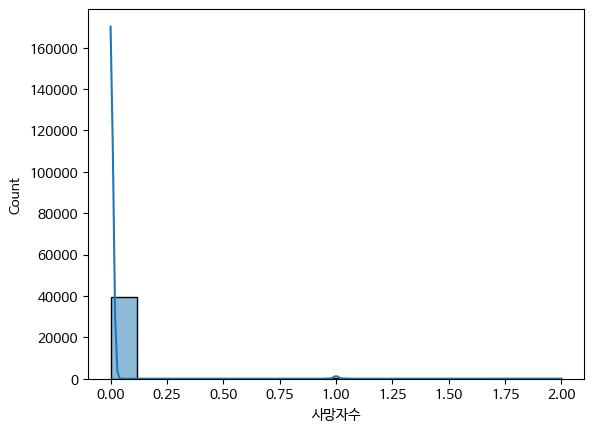

In [ ]:
sns.histplot(df_train['사망자수'], kde=True)
plt.show()

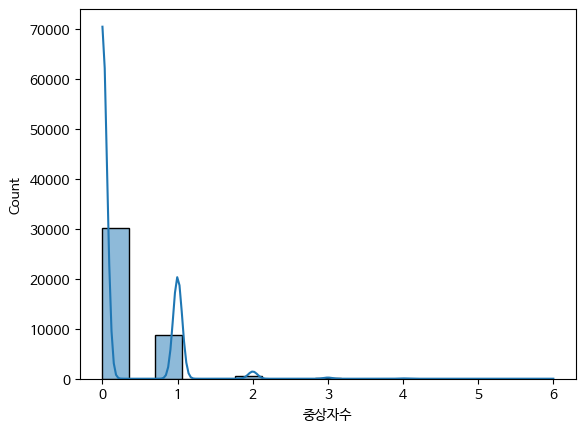

In [ ]:
sns.histplot(df_train['중상자수'], kde=True)
plt.show()

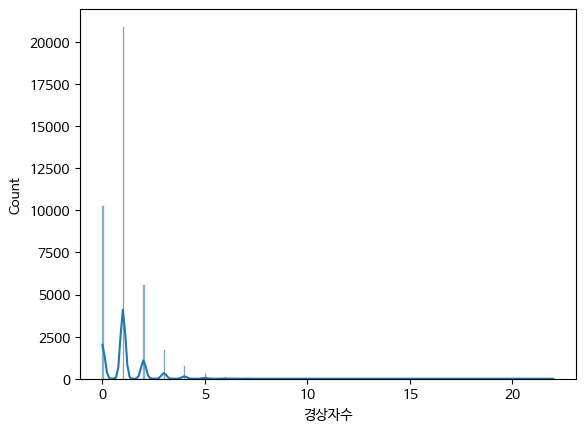

In [ ]:
sns.histplot(df_train['경상자수'], kde=True)
plt.show()

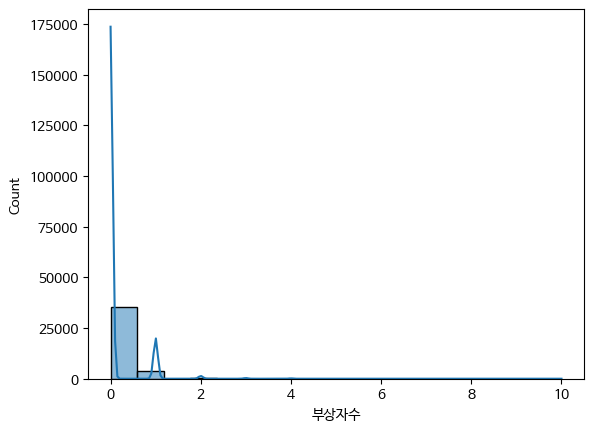

In [ ]:
sns.histplot(df_train['부상자수'], kde=True)
plt.show()

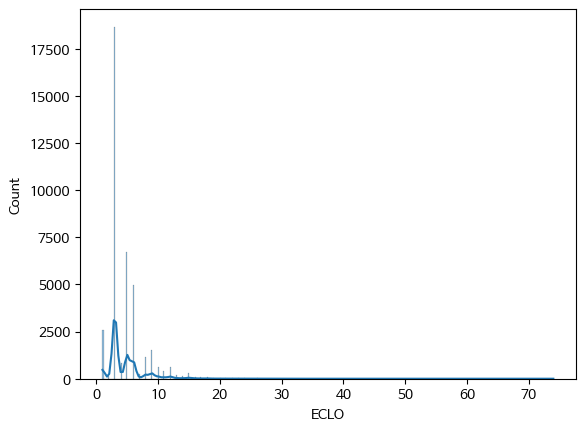

In [ ]:
sns.histplot(df_train['ECLO'], kde=True)
plt.show()

## 시계열 형태로 표현
- `ECLO` 0 이상의 값들만 관측
- 매끄러운 형태로 표현하기 위한 interpolation + imputation 필요

In [ ]:
from datetime import datetime

In [ ]:
df_train['사고일시'] = pd.to_datetime(df_train['사고일시'])

In [ ]:
df_by_time = df_train.sort_values('사고일시')[['사고일시','ECLO']]

In [ ]:
df_by_time = df_by_time[df_by_time['ECLO']>0]

In [ ]:
df_by_time

,사고일시,ECLO
0,2019-01-01 00:00:00,5
1,2019-01-01 00:00:00,3
2,2019-01-01 01:00:00,3
3,2019-01-01 02:00:00,5
4,2019-01-01 04:00:00,3
...,...,...
39605,2021-12-31 19:00:00,3
39603,2021-12-31 19:00:00,3
39606,2021-12-31 21:00:00,10
39607,2021-12-31 22:00:00,3


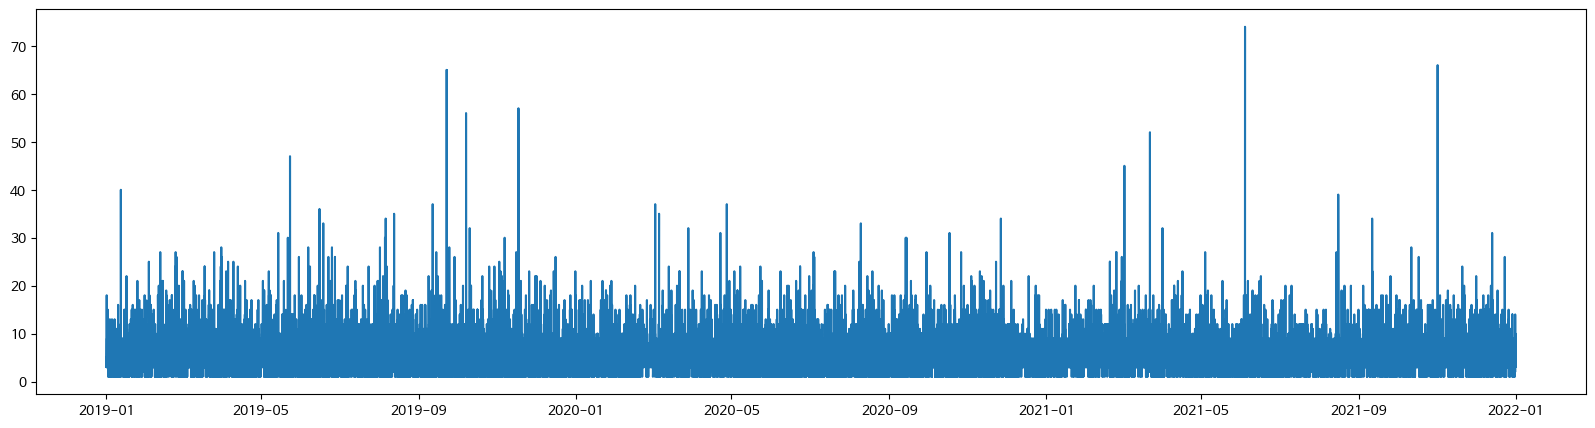

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df_by_time['사고일시'],df_by_time['ECLO'])
plt.show()

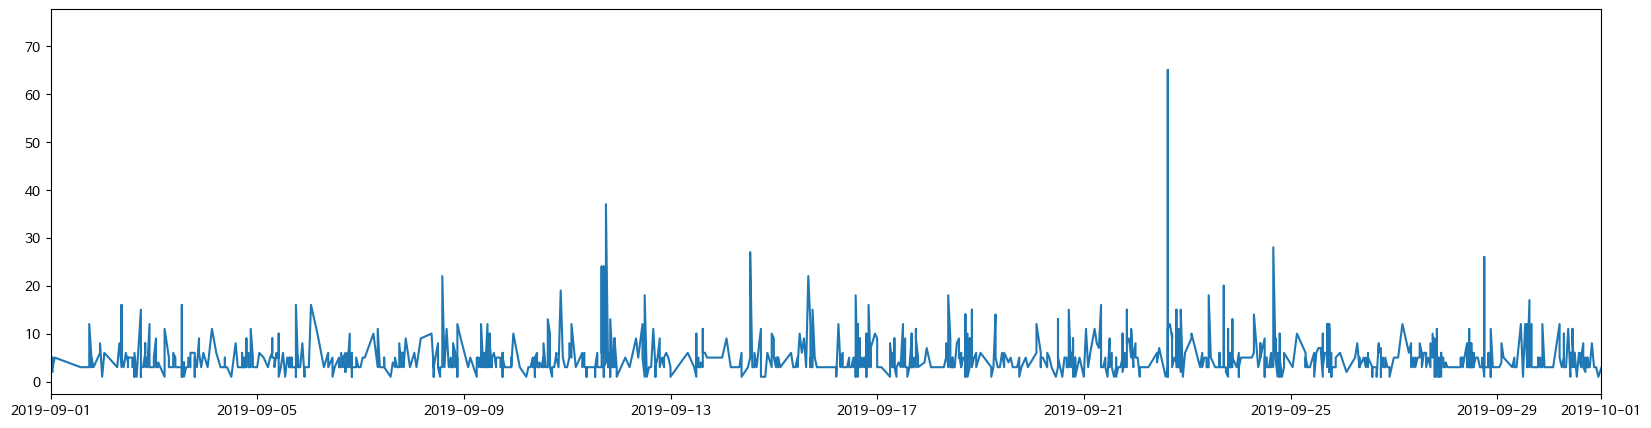

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df_by_time['사고일시'],df_by_time['ECLO'])
plt.xlim(left=datetime(year=2019,month=9,day=1),right=datetime(year=2019,month=10,day=1))
plt.show()

## ECLO

In [ ]:
df_train_temp = df_train[list(df_test.columns[2:])+['ECLO']]

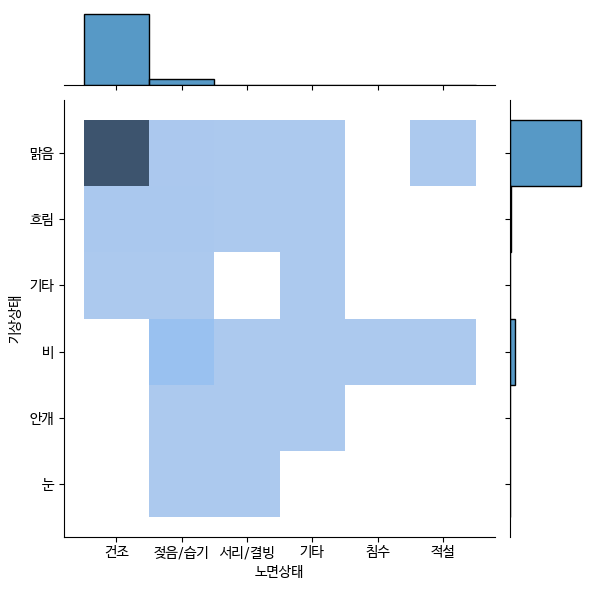

In [ ]:
sns.jointplot(x='노면상태',y='기상상태',data=df_train_temp, kind='hist')

<Axes: xlabel='기상상태', ylabel='ECLO'>

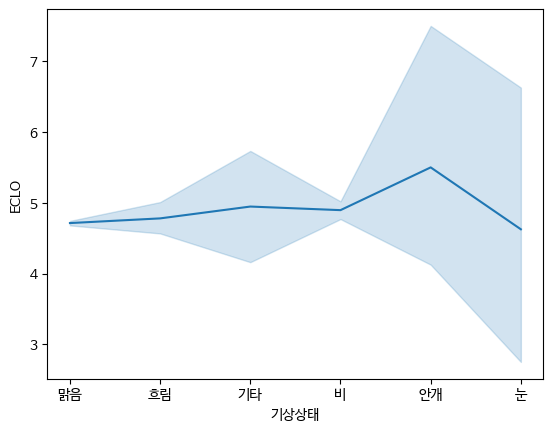

In [ ]:
sns.lineplot(x='기상상태', y='ECLO', data=df_train_temp)

<Axes: xlabel='노면상태', ylabel='ECLO'>

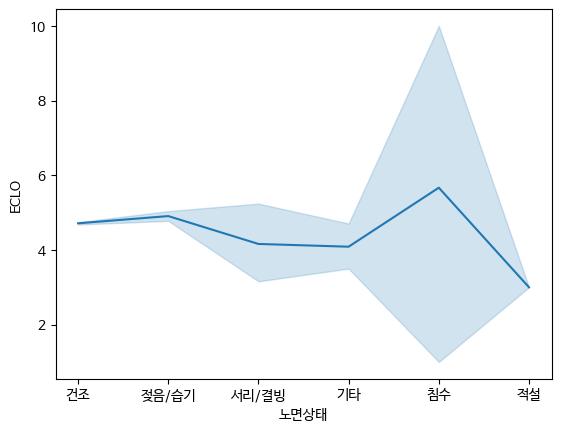

In [ ]:
sns.lineplot(x='노면상태', y='ECLO', data=df_train_temp)

<Axes: xlabel='요일', ylabel='ECLO'>

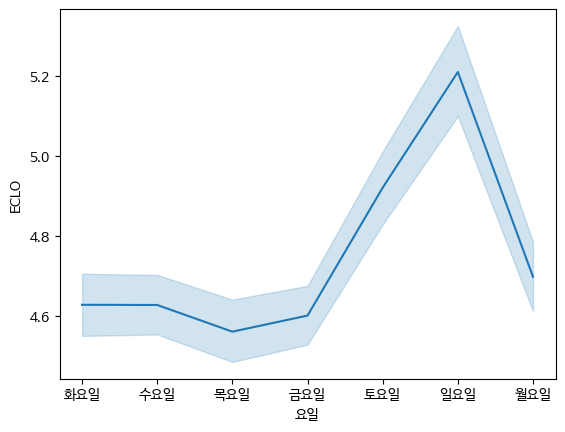

In [ ]:
sns.lineplot(x='요일', y='ECLO', data=df_train_temp)

<Axes: xlabel='사고유형', ylabel='ECLO'>

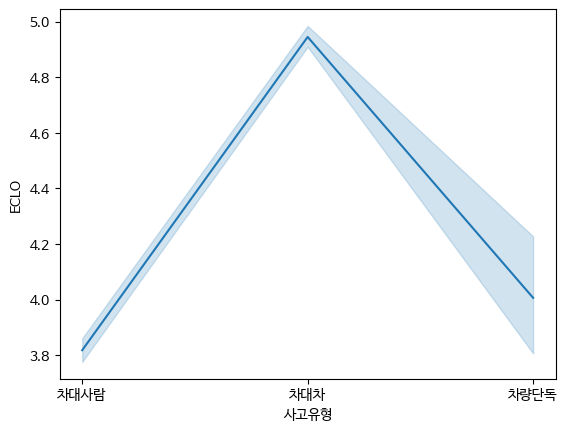

In [ ]:
sns.lineplot(x='사고유형', y='ECLO', data=df_train_temp)

<Axes: xlabel='월일', ylabel='ECLO'>

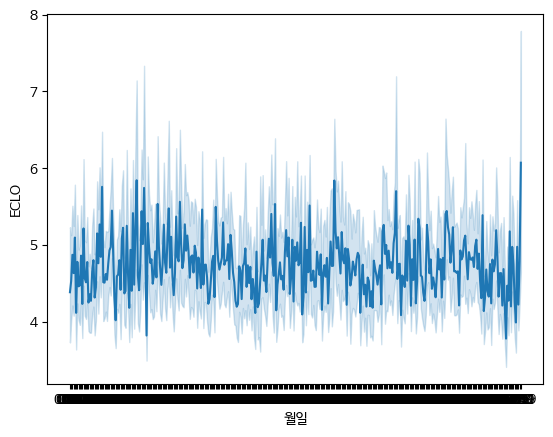

In [ ]:
sns.lineplot(x='월일', y='ECLO', data=df_train_temp)

<Axes: xlabel='월', ylabel='ECLO'>

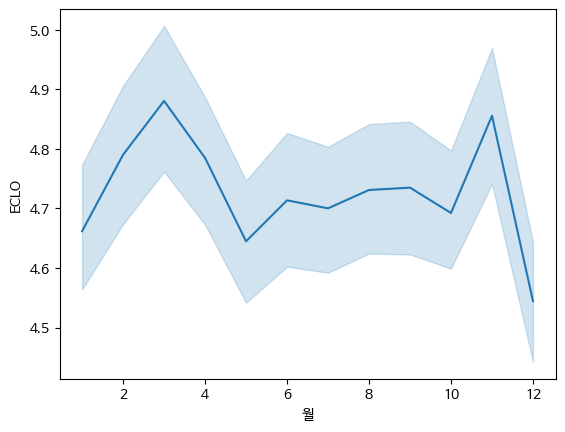

In [ ]:
sns.lineplot(x='월', y='ECLO', data=df_train_temp)

<Axes: xlabel='시간', ylabel='ECLO'>

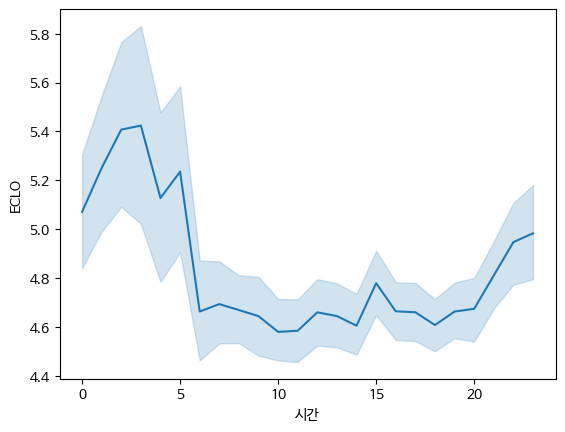

In [ ]:
sns.lineplot(x='시간', y='ECLO', data=df_train_temp)

<Axes: xlabel='구', ylabel='ECLO'>

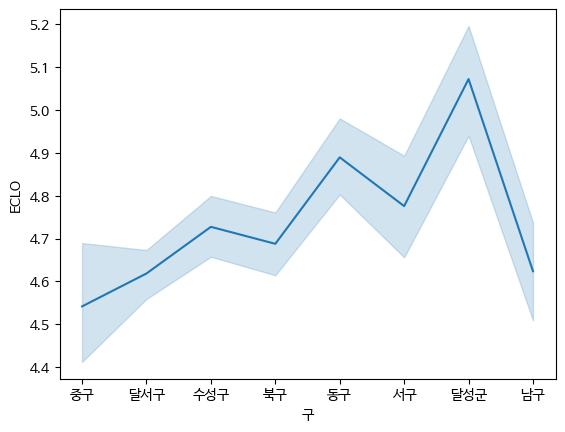

In [ ]:
sns.lineplot(x='구', y='ECLO', data=df_train_temp)

<Axes: xlabel='동', ylabel='ECLO'>

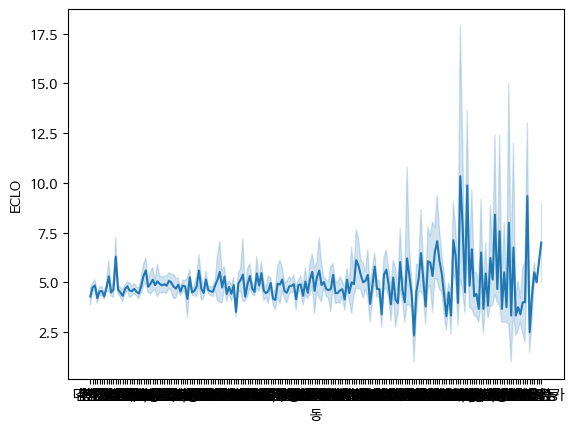

In [ ]:
sns.lineplot(x='동', y='ECLO', data=df_train_temp)

<Axes: xlabel='도로형태1', ylabel='ECLO'>

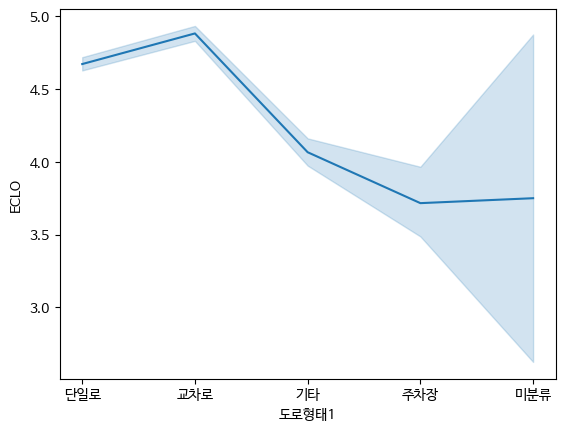

In [ ]:
sns.lineplot(x='도로형태1', y='ECLO', data=df_train_temp)

<Axes: xlabel='도로형태2', ylabel='ECLO'>

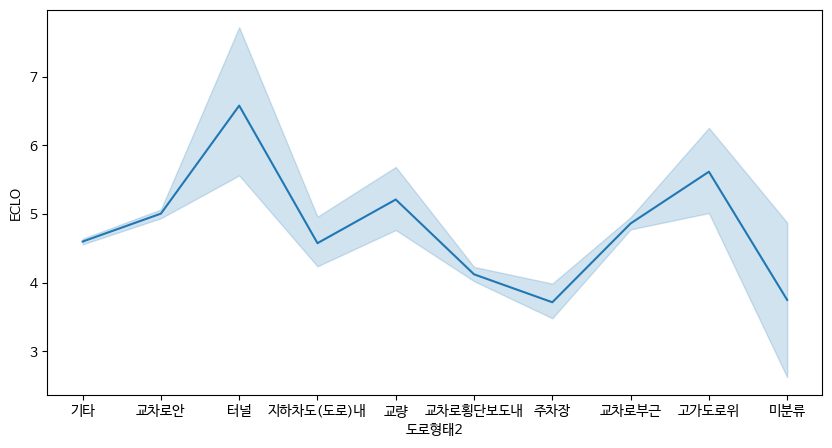

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x='도로형태2', y='ECLO', data=df_train_temp)

#  전국 데이터와 대구 데이터 비교

In [ ]:
df_countrywide = pd.read_csv('./countrywide_accident.csv')

In [ ]:
time_pattern = r'(\d{4})-(\d{1,2})-(\d{1,2}) (\d{1,2})'

df_countrywide[['연', '월', '일', '시간']] = df_countrywide['사고일시'].str.extract(time_pattern)
df_countrywide['월일'] = df_countrywide['월'] + df_countrywide['일']
df_countrywide[['연', '월', '일', '시간']] = df_countrywide[['연', '월', '일', '시간']].apply(pd.to_numeric)

In [ ]:
location_pattern = r'(\S+) (\S+) (\S+)'

df_countrywide[['도시', '구', '동']] = df_countrywide['시군구'].str.extract(location_pattern)
df_countrywide = df_countrywide.drop(columns=['시군구'])

In [ ]:
road_pattern = r'(.+) - (.+)'

df_countrywide[['도로형태1', '도로형태2']] = df_countrywide['도로형태'].str.extract(road_pattern)
df_countrywide = df_countrywide.drop(columns=['도로형태'])

In [ ]:
df_countrywide.loc[:,'가해운전자 연령'][df_countrywide['가해운전자 연령']=='미분류'] = [np.nan] * len(df_countrywide[df_countrywide['가해운전자 연령']=='미분류'])
df_countrywide.loc[:,'피해운전자 연령'][df_countrywide['피해운전자 연령']=='미분류'] = [np.nan] * len(df_countrywide[df_countrywide['피해운전자 연령']=='미분류'])
df_countrywide.loc[:,'가해운전자 연령'][~df_countrywide['가해운전자 연령'].isna()] = df_countrywide.loc[:,'가해운전자 연령'][~df_countrywide['가해운전자 연령'].isna()].str.replace('세','').str.replace('이상','').astype(int)
df_countrywide.loc[:,'피해운전자 연령'][~df_countrywide['피해운전자 연령'].isna()] = df_countrywide.loc[:,'피해운전자 연령'][~df_countrywide['피해운전자 연령'].isna()].str.replace('세','').str.replace('이상','').astype(int)

In [ ]:
df_countrywide['도시'].unique()

array(['서울특별시', '경기도', '인천광역시', '전라남도', '충청남도', '광주광역시', '부산광역시', '강원도',
       '울산광역시', '전라북도', '경상남도', '경상북도', '충청북도', '대전광역시', '제주특별자치도',
       '세종특별자치시', '미분류', nan], dtype=object)

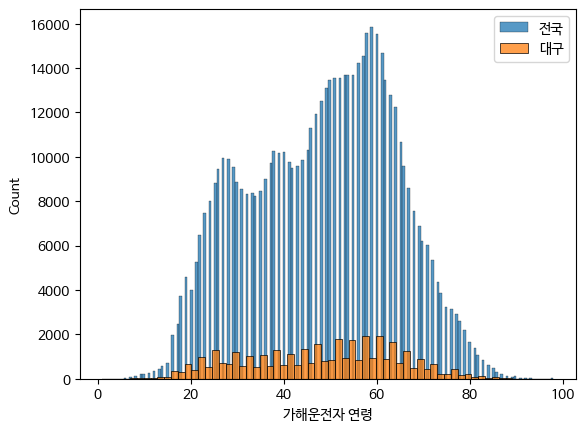

In [ ]:
sns.histplot(x='가해운전자 연령',data=df_countrywide,label='전국')
sns.histplot(x='가해운전자 연령',data=df_train,label='대구')

plt.legend()
plt.show()

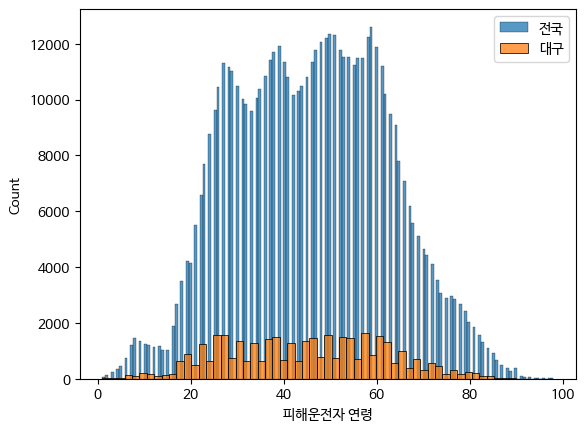

In [ ]:
sns.histplot(x='피해운전자 연령',data=df_countrywide,label='전국')
sns.histplot(x='피해운전자 연령',data=df_train,label='대구')

plt.legend()
plt.show()

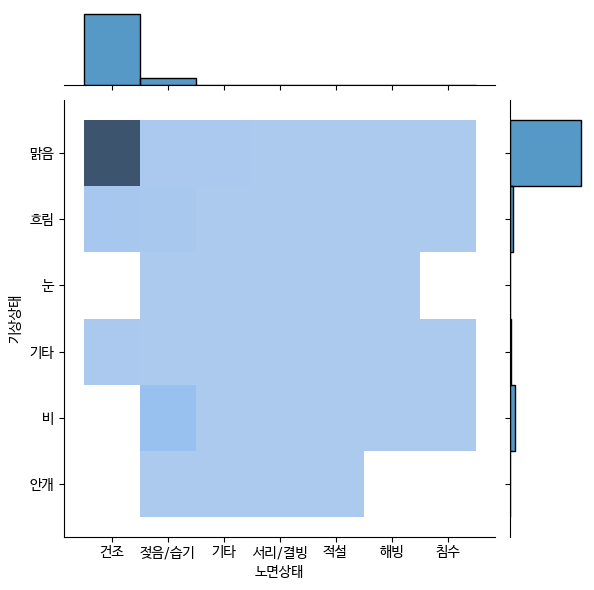

In [ ]:
sns.jointplot(x='노면상태',y='기상상태',data=df_countrywide, kind='hist')

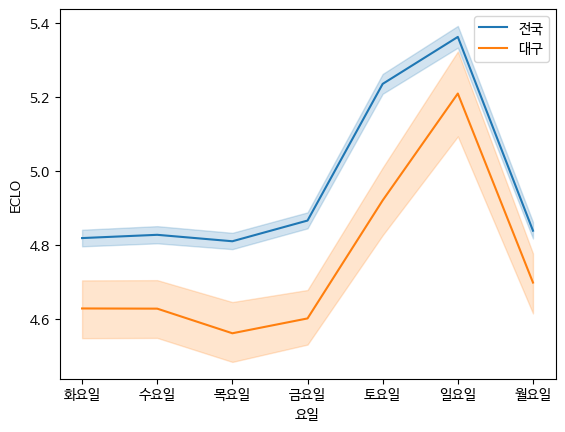

In [ ]:
sns.lineplot(x='요일',y='ECLO',data=df_countrywide,label='전국')
sns.lineplot(x='요일',y='ECLO',data=df_train,label='대구')

plt.legend()
plt.show()

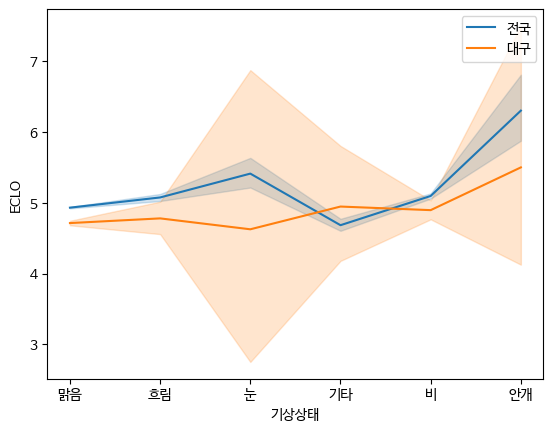

In [ ]:
x = '기상상태'

sns.lineplot(x=x,y='ECLO',data=df_countrywide,label='전국')
sns.lineplot(x=x,y='ECLO',data=df_train,label='대구')

plt.legend()
plt.show()

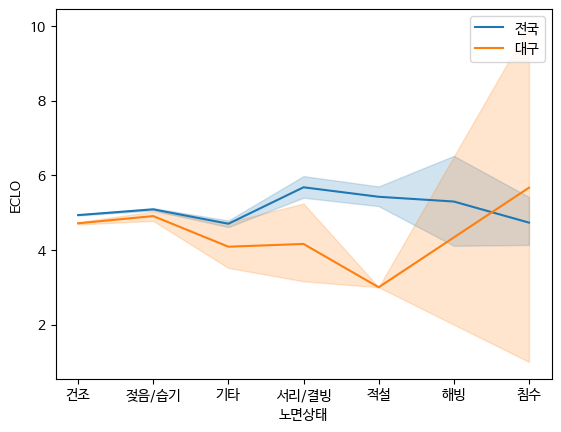

In [ ]:
x = '노면상태'

sns.lineplot(x=x,y='ECLO',data=df_countrywide,label='전국')
sns.lineplot(x=x,y='ECLO',data=df_train,label='대구')

plt.legend()
plt.show()

In [ ]:
df_countrywide.columns

Index(['ID', '사고일시', '요일', '기상상태', '노면상태', '사고유형', '사고유형 - 세부분류', '법규위반',
       '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종',
       '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '사망자수', '중상자수', '경상자수', '부상자수',
       'ECLO', '연', '월', '일', '시간', '월일', '도시', '구', '동', '도로형태1', '도로형태2'],
      dtype='object')

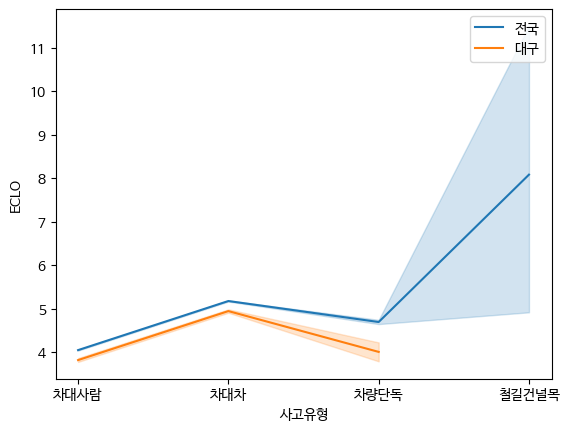

In [ ]:
x = '사고유형'

sns.lineplot(x=x,y='ECLO',data=df_countrywide,label='전국')
sns.lineplot(x=x,y='ECLO',data=df_train,label='대구')

plt.legend()
plt.show()

In [ ]:
df_train['법규위반'].value_counts()

안전운전불이행      21876
안전거리미확보       5277
신호위반          3786
교차로운행방법위반     2750
기타            1396
보행자보호의무위반     1154
직진우회전진행방해      980
차로위반           949
중앙선침범          881
불법유턴           427
과속             133
Name: 법규위반, dtype: int64

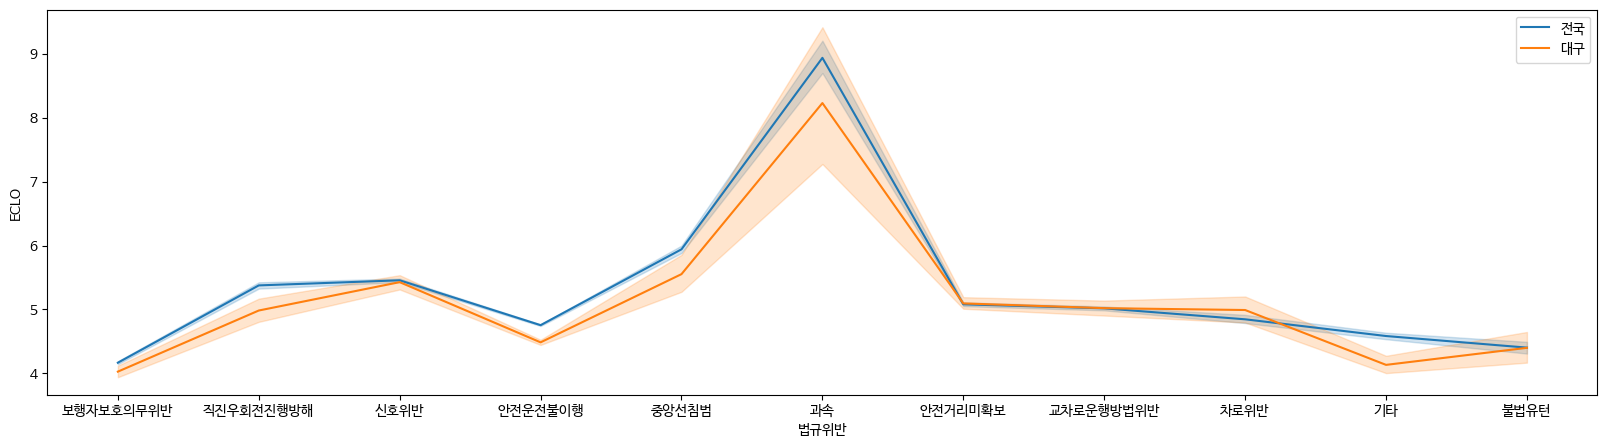

In [ ]:
plt.figure(figsize=(20,5))
x = '법규위반'

sns.lineplot(x=x,y='ECLO',data=df_countrywide,label='전국')
sns.lineplot(x=x,y='ECLO',data=df_train,label='대구')

plt.legend()
plt.show()

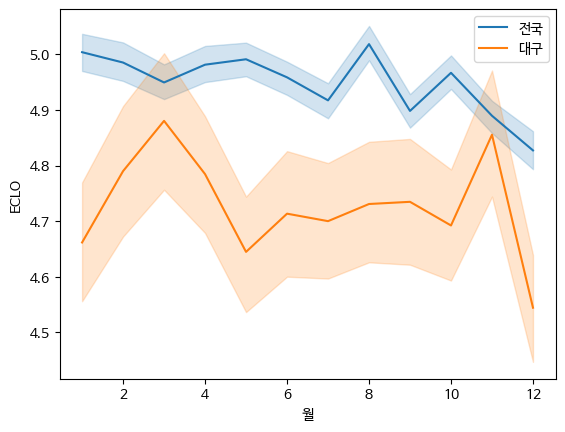

In [ ]:
x = '월'

sns.lineplot(x=x,y='ECLO',data=df_countrywide,label='전국')
sns.lineplot(x=x,y='ECLO',data=df_train,label='대구')

plt.legend()
plt.show()

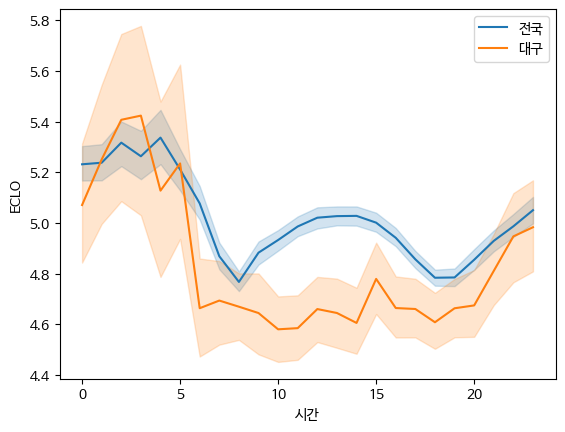

In [ ]:
x = '시간'

sns.lineplot(x=x,y='ECLO',data=df_countrywide,label='전국')
sns.lineplot(x=x,y='ECLO',data=df_train,label='대구')

plt.legend()
plt.show()

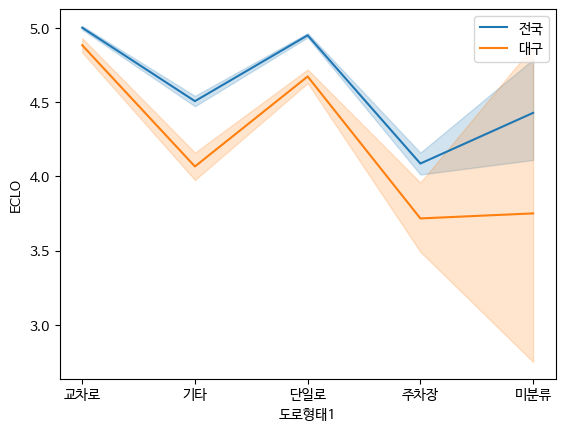

In [ ]:
x = '도로형태1'

sns.lineplot(x=x,y='ECLO',data=df_countrywide,label='전국')
sns.lineplot(x=x,y='ECLO',data=df_train,label='대구')

plt.legend()
plt.show()

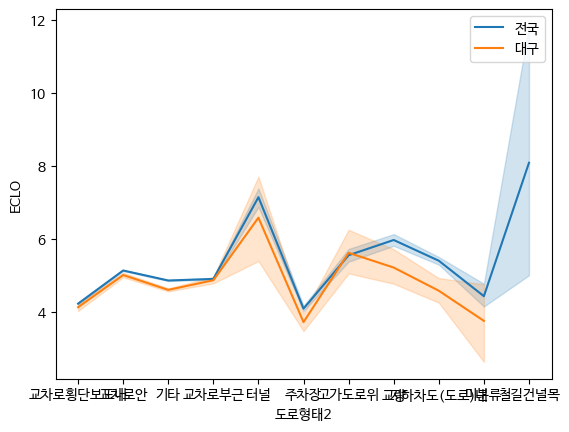

In [ ]:
x = '도로형태2'

sns.lineplot(x=x,y='ECLO',data=df_countrywide,label='전국')
sns.lineplot(x=x,y='ECLO',data=df_train,label='대구')

plt.legend()
plt.show()

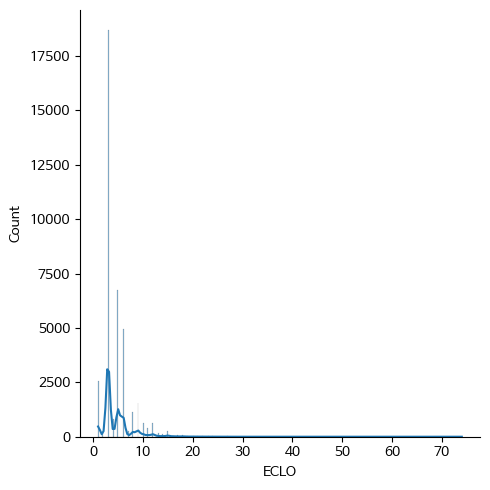

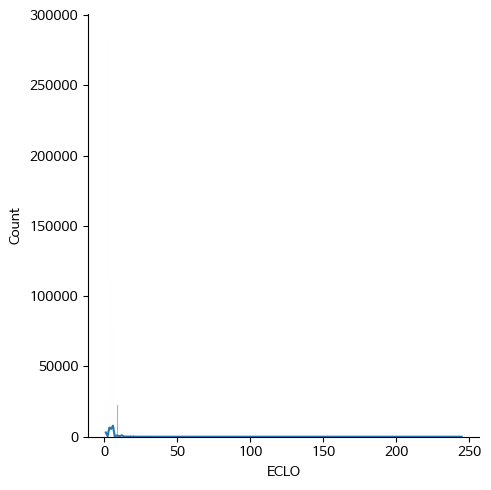

In [ ]:
sns.displot(x='ECLO',
            data=df_train,
            kde=True
            )
sns.displot(x='ECLO',
            data=df_countrywide,
            kde=True
            )

plt.show()